In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('../../Datasets/Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df2 = df.drop(['country'], axis=1)

In [6]:
X_scaled = StandardScaler().fit_transform(df2)

In [7]:
X_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [8]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10)
    km.fit_predict(X_scaled)
    wcss.append(km.inertia_)

D:\PythonDS\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\PythonDS\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\PythonDS\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\PythonDS\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

<Axes: >

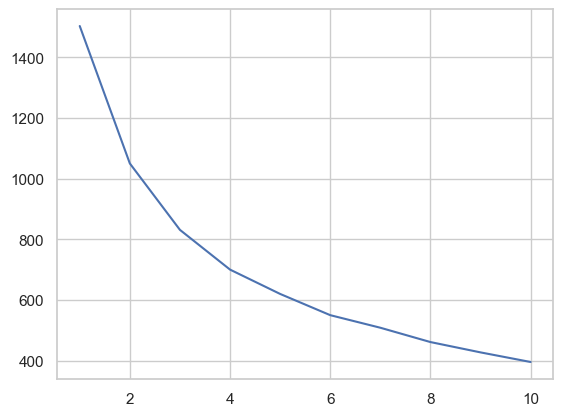

In [11]:
sns.set(style='whitegrid')
sns.lineplot(x=range(1,11), y=wcss)

In [33]:
km = KMeans(n_clusters=5, init='k-means++', n_init=10)

In [34]:
labels = km.fit_predict(X_scaled)

D:\PythonDS\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
km.inertia_

631.3877859960571

In [36]:
km.cluster_centers_

array([[-0.82629395,  0.14381033,  0.88523713, -0.34020983,  1.52062129,
        -0.46696693,  1.11229484, -0.74497217,  1.74235844],
       [-0.2825192 , -0.43364255, -0.52798919, -0.65662715, -0.21749001,
         0.4281497 ,  0.23294002, -0.28442159, -0.37150208],
       [-0.52971805,  0.34896606,  0.06182404,  0.56146558, -0.18420445,
        -0.37970164,  0.31168335, -0.54423979, -0.27029119],
       [ 1.39052846, -0.44568534, -0.17203068, -0.18179731, -0.69679938,
         0.39266281, -1.30182572,  1.37139779, -0.60730886],
       [-0.84900324,  4.93567278, -0.00816303,  4.54805768,  2.4395424 ,
        -0.50420614,  1.22682431, -1.03886271,  2.44079735]])

In [37]:
score = silhouette_score(X_scaled, labels)
print(score)

0.22327899566511256


### PCA

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA()

In [41]:
components = pca.fit_transform(X_scaled)

In [42]:
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [44]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [45]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

<Axes: >

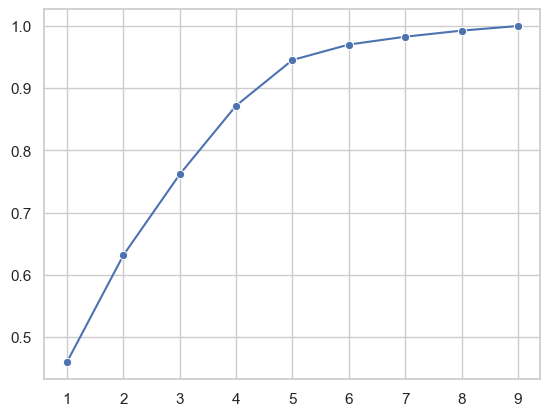

In [49]:
sns.lineplot(x=range(1, len(cumsum)+1), y=cumsum, marker='o')

In [50]:
pca = PCA(n_components=2)

In [52]:
p_components = pca.fit_transform(X_scaled)

In [53]:
import plotly.express as px

In [58]:
plot_df = pd.DataFrame(p_components, columns=['PCA 1', 'PCA 2'])
plot_df['clusters']=labels
plot_df['country'] = df['country'].values

In [59]:
plot_df

,PCA 1,PCA 2,clusters,country
0,-2.913025,0.095621,3,Afghanistan
1,0.429911,-0.588156,2,Albania
2,-0.285225,-0.455174,1,Algeria
3,-2.932423,1.695555,3,Angola
4,1.033576,0.136659,2,Antigua and Barbuda
...,...,...,...,...
162,-0.820631,0.639570,2,Vanuatu
163,-0.551036,-1.233886,1,Venezuela
164,0.498524,1.390744,2,Vietnam
165,-1.887451,-0.109453,3,Yemen


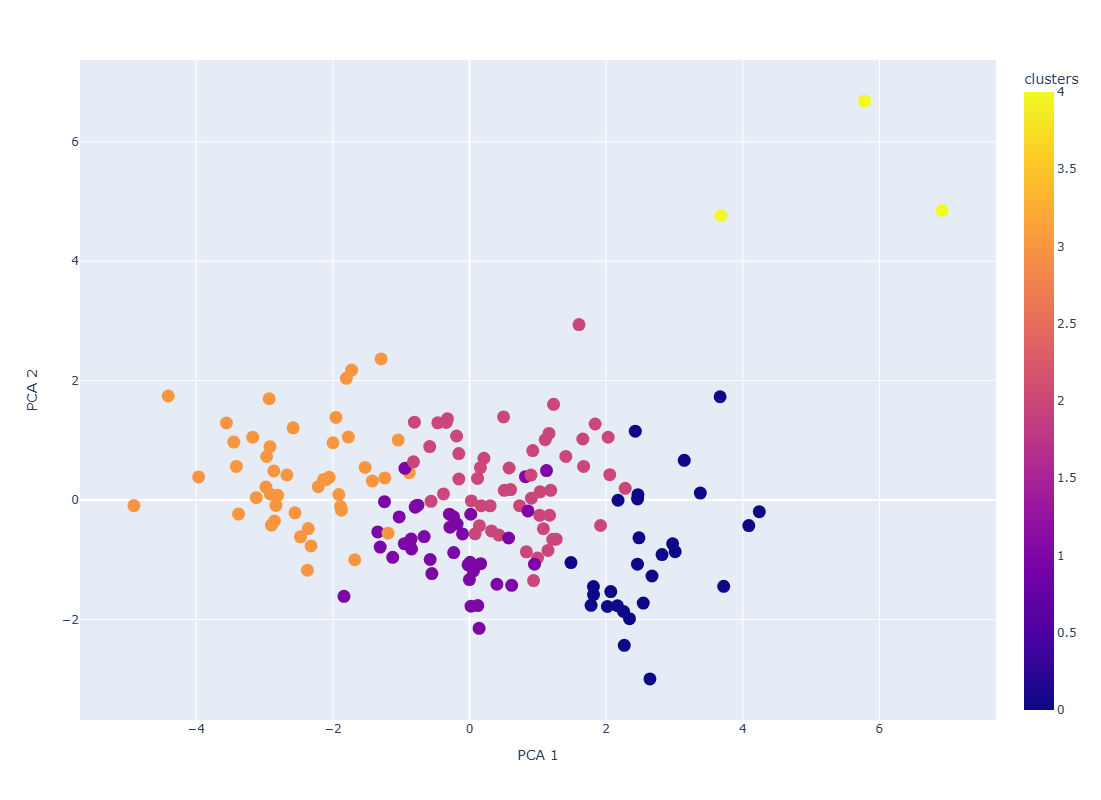

In [62]:
fig = px.scatter(
    plot_df,
    x='PCA 1',
    y='PCA 2',
    color='clusters',
    hover_name = 'country',
    height=800
)
fig.update_traces(marker=dict(size=13))
fig.show()

### UMAP

In [88]:
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2, min_dist=1, n_neighbors=5, metric='euclidean', n_jobs=-1, random_state=42)

In [89]:
embedding = reducer.fit_transform(X_scaled)

D:\PythonDS\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

D:\PythonDS\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [90]:
plot_df = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2'])
plot_df['clusters']=labels
plot_df['country'] = df['country'].values

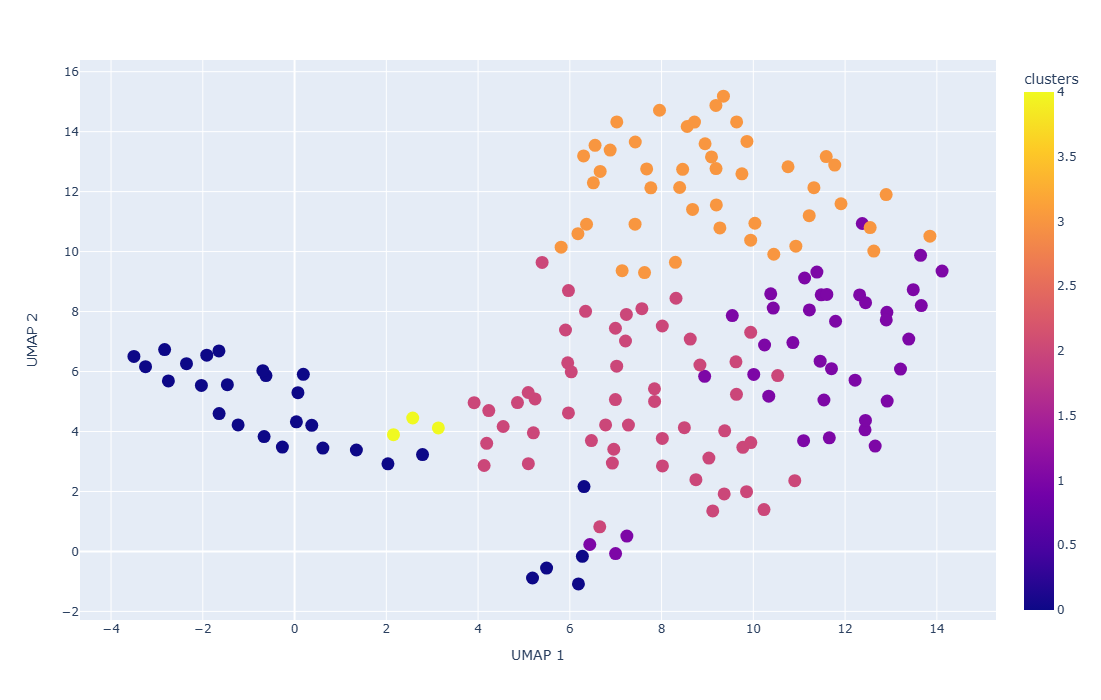

In [91]:
fig = px.scatter(
    plot_df,
    x='UMAP 1',
    y='UMAP 2',
    color='clusters',
    hover_name = 'country',
    height=700
)
fig.update_traces(marker=dict(size=13))
fig.show()

### Kernel PCA

In [93]:
from sklearn.decomposition import KernelPCA

In [115]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.6)

In [116]:
r_comps = rbf_pca.fit_transform(X_scaled)

In [117]:
plot_df = pd.DataFrame(r_comps, columns=['KPCA 1', 'KPCA 2'])
plot_df['clusters']=labels
plot_df['country'] = df['country'].values

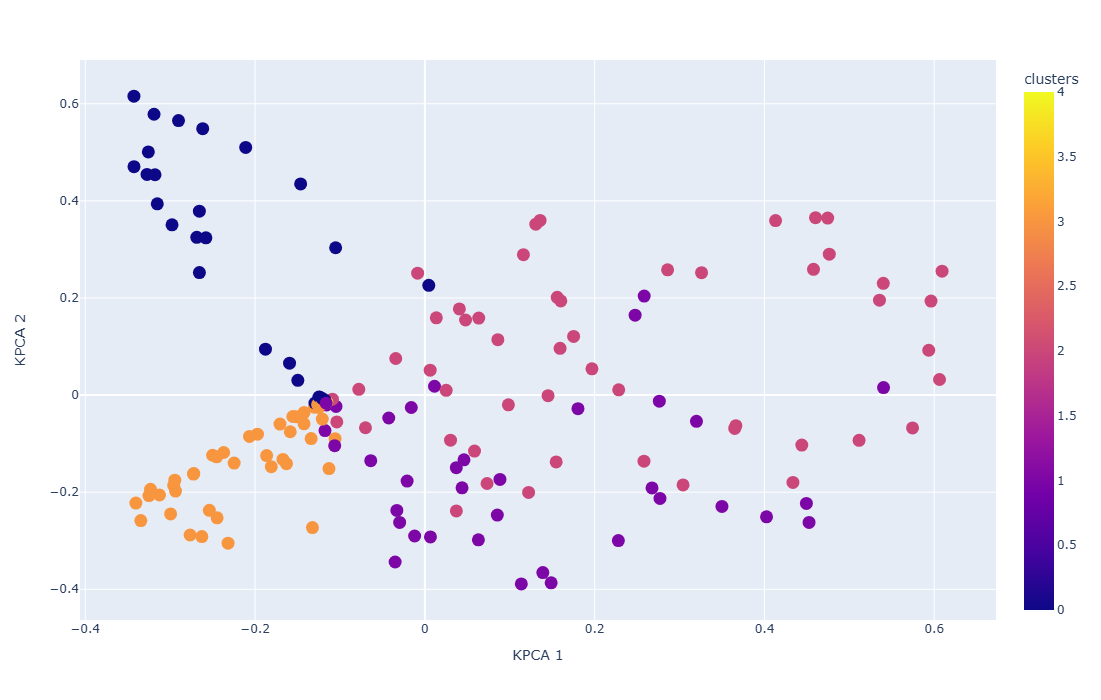

In [118]:
fig = px.scatter(
    plot_df,
    x='KPCA 1',
    y='KPCA 2',
    color='clusters',
    hover_name = 'country',
    height=700
)
fig.update_traces(marker=dict(size=13))
fig.show()